# Implémentation d'un classifieur Random Forest avec sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import random
data_load = False
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

## Chargement des data

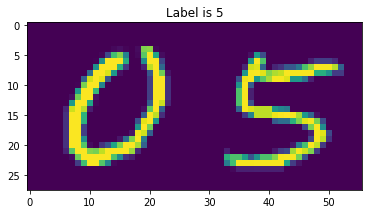

In [2]:
if not data_load :
    train_x = pd.read_csv('./classification-of-mnist-digits/train.csv')
    train_y = pd.read_csv('./classification-of-mnist-digits/train_result.csv')
    test_x = pd.read_csv('./classification-of-mnist-digits/test.csv')
    data_load = True
for i in train_x.index:
    data = train_x.loc[i].values[:-1].reshape(28,56)
    plt.title(f'Label is {train_y.loc[i].values[1]}')
    plt.imshow(data)
    plt.show()
    break

## Traitement des data

In [3]:
# def one_hot(a, num_classes):
#   return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

train_x = train_x.iloc[: , :-1].to_numpy()
test_x = test_x.iloc[: , :-1].to_numpy()
train_y = np.squeeze(train_y.iloc[:,1:].to_numpy())

In [4]:
train_y = np.squeeze(train_y)

## Construction du modèle, entraînement et prédiction du jeu de test

In [5]:
#Create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(train_x,train_y)

preds =clf.predict(test_x)

## Chargement des résultats dans un csv conforme

In [6]:
# creating a list of index names
index_values = [i for i in range(0, 10000)]
# creating a list of column names
column_values = ['Index', 'Class']
  
# creating the dataframe
df = pd.DataFrame(columns = column_values, index = index_values)
df['Class']= preds
df['Index']= index_values
print(df)
df.to_csv('./submission_RF.csv', index=False)

      Index  Class
0         0     14
1         1      7
2         2     10
3         3      7
4         4      5
...     ...    ...
9995   9995      9
9996   9996     12
9997   9997     10
9998   9998      4
9999   9999      6

[10000 rows x 2 columns]
